In [6]:
import cv2
import hyperopt
import hyperopt.pyll.stochastic
from hyperopt import Trials, fmin, hp, space_eval, tpe

from ocr import cummulative_dissimilarity, dissimilarity
from utils import hprange

Let's define the search space:

In [3]:
search_space = {
    "resize": hprange("resize", 50, 200),
    "binarize": hp.choice(
        "binarize",
        [
            (
                True,
                (
                    hp.choice(
                        "binarize_algorithm",
                        [cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.ADAPTIVE_THRESH_MEAN_C],
                    ),
                    hprange("binarize_blocksize", 15, 27, 2),
                    hprange("binarize_c", 8, 13),
                ),
                {
                    "dilate": hp.choice(
                        "dilate", [(True, hprange("dilate_kernel", 1, 4, 2)), (False,)]
                    ),
                    "erode": hp.choice(
                        "erode", [(True, hprange("erode_kernel", 1, 4, 2)), (False,)]
                    ),
                },
            ),
            (False,),
        ],
    ),
    "denoise": hp.choice(
        "denoise",
        [
            (
                True,
                (
                    hprange("denoise_h", 1, 8, 2),
                    hprange("denoise_windowsize", 15, 26, 2),
                    hprange("denoise_blocksize", 5, 12, 2),
                ),
            ),
            (False,),
        ],
    ),
}

We can check some example values by sampling from the space a couple of times:

In [6]:
for _ in range(5):
    print(hyperopt.pyll.stochastic.sample(search_space))

{'binarize': (True, (0, 21, 10), {'dilate': (False,), 'erode': (False,)}), 'denoise': (False,), 'resize': 144}
{'binarize': (False,), 'denoise': (False,), 'resize': 92}
{'binarize': (False,), 'denoise': (True, (1, 25, 9)), 'resize': 173}
{'binarize': (True, (1, 15, 12), {'dilate': (False,), 'erode': (False,)}), 'denoise': (True, (5, 17, 11)), 'resize': 114}
{'binarize': (False,), 'denoise': (False,), 'resize': 76}


The impact of different values on the output can be seen below:

{'binarize': (True, (0, 25, 11), {'dilate': (True, 1), 'erode': (False,)}), 'denoise': (False,), 'resize': 141}


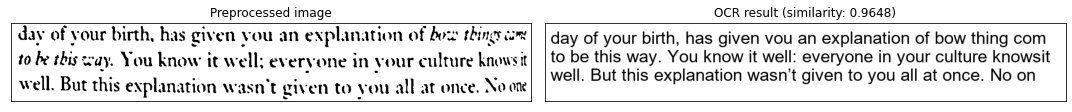

{'binarize': (False,), 'denoise': (False,), 'resize': 77}


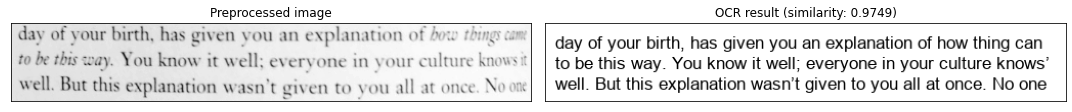

In [23]:
for _ in range(2):
    params = hyperopt.pyll.stochastic.sample(search_space)
    print(params)
    dissimilarity('data/images/8.jpg', 'data/texts/8.txt', params, display=True)

Finally, let's run the Hyperopt optimization over 1000 samples:

In [28]:
trials = Trials()
best = fmin(
    cummulative_dissimilarity,
    search_space,
    algo=tpe.suggest,
    max_evals=1000,
    trials=trials,
)

100%|██████████| 1000/1000 [41:56<00:00,  2.52s/trial, best loss: 0.2885985875946734] 


Results for the best parameters found can be seen below:

{'binarize': (False,), 'denoise': (False,), 'resize': 143}


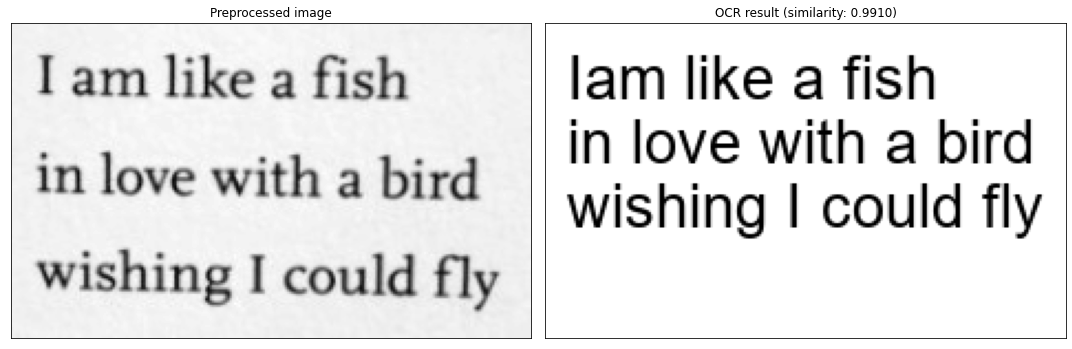

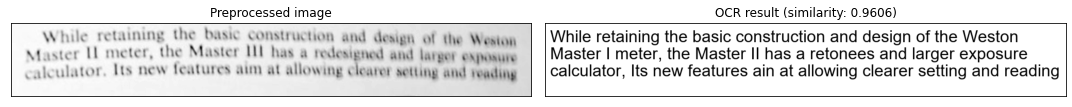

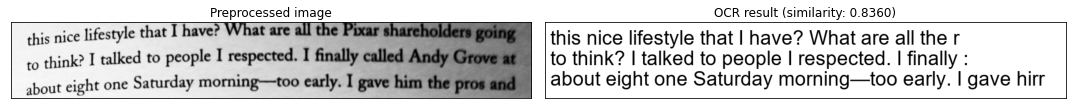

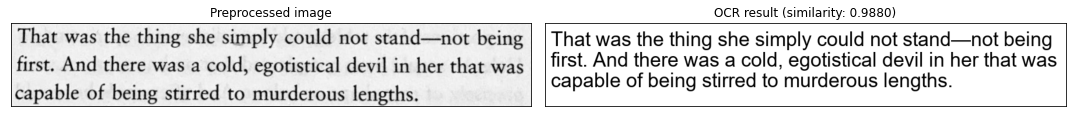

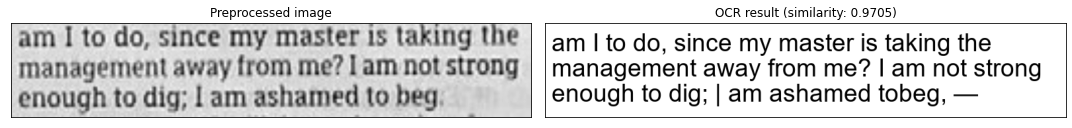

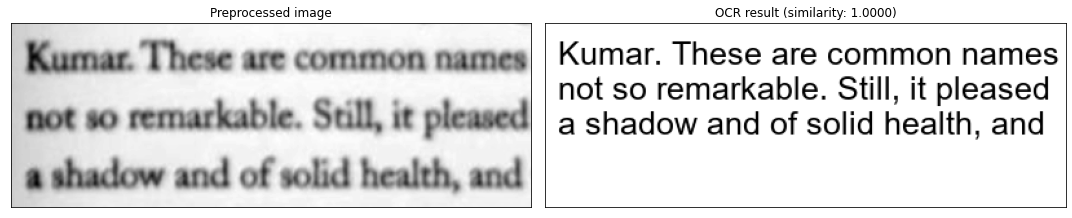

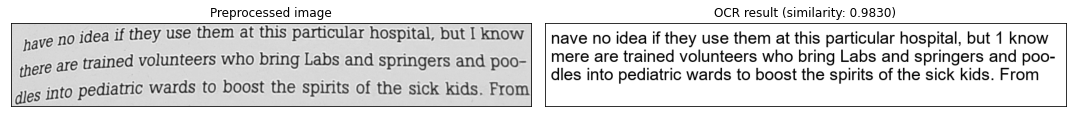

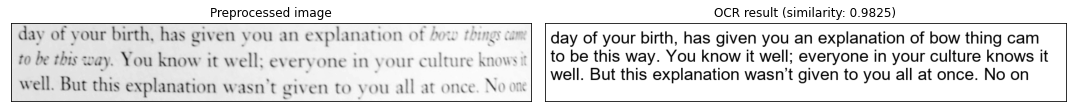

{'loss': 0.2885985875946734,
 'status': 'ok',
 'params': {'binarize': (False,), 'denoise': (False,), 'resize': 143}}

In [37]:
params = space_eval(search_space, best)
print(params)
cummulative_dissimilarity(params, display=True)